## Representación numérica de documentos 

En este notebook veremos como representar documentos siguiendo la metodología Bag of Words (BoW)

La metodología Bag of Words (BoW) representa vectorialmente documentos ignorando el orden de las palabras. Para implementar este método hay que disponer de tres elementos:

1. Un corpus con varios documentos
2. Un vocabulario de las palabras de nuestro corpus.
3. Una métrica para medir la presencia o no de palabras en los documentos.

En esta ocasión utilizaremos las funcionalidades que nos brinda Scikit-Learn para calcular la representación de nuestros textos.

### Obtención de un corpus

Para este ejercicio vamos a trabajar con un corpus pequeño, que nos permita ver y entender fácilmente los parámetros de las funciones.

In [4]:
corpus = ["Yo quiero agua", "Yo quiero cocacola","Yo quiero agua y un agua","Yo no quiero vino","Yo quiero un entrecto"]


### Vocabulario de palabras

En scikit-learn podemos utilizar distintas funciones para obtener el vocabulario de un cropus de documentos. Ambas están presentes dentro del m
odulo feature_extraction,text y son <code>CountVectorizer</code> y <code>TfidfVectorizer</code>. Vamos a crear un objeto con cada una de esas clases para introducir nuestro corpus y extraer el vocabulario.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

# Creamos los objetos
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(norm=None,smooth_idf=False) 

In [11]:
# Obtenemos Fit con nuestro corpus

count_data = count_vectorizer.fit(corpus)
tfidf_data = tfidf_vectorizer.fit(corpus)

In [13]:
# Obtenemos los vocabularios de dos formas: 

print("COUNT VECTORIXER")
print("Obtenemos un dictionario que mapea las palabras con su posición en el vector del vocabulario")
print(count_data.vocabulary_)

COUNT VECTORIXER
Obtenemos un dictionario que mapea las palabras con su posición en el vector del vocabulario
{'yo': 7, 'quiero': 4, 'agua': 0, 'cocacola': 1, 'un': 5, 'no': 3, 'vino': 6, 'entrecto': 2}


In [15]:
print("Obtenemos el vocabulario en si mismo como una lista")
print(count_data.get_feature_names_out())
print("Numero de características:")
print(len(count_data.get_feature_names_out()))

Obtenemos el vocabulario en si mismo como una lista
['agua' 'cocacola' 'entrecto' 'no' 'quiero' 'un' 'vino' 'yo']
Numero de características:
8


In [17]:
# Obviamente, dado que hemos utilizado el mismo corpus, obtenemos el mismo resultado con el tfidf_vectorizer.
print("\n\n TF-IDF VECTORIZER")
print("Obtenemos un dictionario que mapea las palabras con su posición en el vector del vocabulario")
print(tfidf_data.vocabulary_)
print("Obtenemos el vocabulario en si mismo como una lista")
print(tfidf_data.get_feature_names_out())
print("Numero de características:")
print(len(tfidf_data.get_feature_names_out()))



 TF-IDF VECTORIZER
Obtenemos un dictionario que mapea las palabras con su posición en el vector del vocabulario
{'yo': 7, 'quiero': 4, 'agua': 0, 'cocacola': 1, 'un': 5, 'no': 3, 'vino': 6, 'entrecto': 2}
Obtenemos el vocabulario en si mismo como una lista
['agua' 'cocacola' 'entrecto' 'no' 'quiero' 'un' 'vino' 'yo']
Numero de características:
8


### Resultados con distintas métricas

En esta ocasión vamos a mostrar los resultados con dos métricas distintas. El <code> CountVectorizer</code> mostrará el conteo de veces que una palabra del vocabulario está presente dentro del documento, el <code>TfidfVectorizer </code> mostrará el resutlado con la métrica TF-IDF mostrada en los apuntes.

In [20]:
# Resultado del CountVectorizer 
count_data_result = count_data.transform(corpus).toarray()
print(count_data_result)

[[1 0 0 0 1 0 0 1]
 [0 1 0 0 1 0 0 1]
 [2 0 0 0 1 1 0 1]
 [0 0 0 1 1 0 1 1]
 [0 0 1 0 1 1 0 1]]


In [24]:
# Resultado del TfidfVectorizer
tfidf_data_result = tfidf_data.transform(corpus).toarray()
print(tfidf_data_result)

[[1.91629073 0.         0.         0.         1.         0.
  0.         1.        ]
 [0.         2.60943791 0.         0.         1.         0.
  0.         1.        ]
 [3.83258146 0.         0.         0.         1.         1.91629073
  0.         1.        ]
 [0.         0.         0.         2.60943791 1.         0.
  2.60943791 1.        ]
 [0.         0.         2.60943791 0.         1.         1.91629073
  0.         1.        ]]


Vamos a mostrar los resultados con seaborn para que se vean mejor. Importante mencionar que esto se puede hacer cuando el vocabulario es muy reducido, si no podría ocasionar problemas en la memoria.

<Axes: >

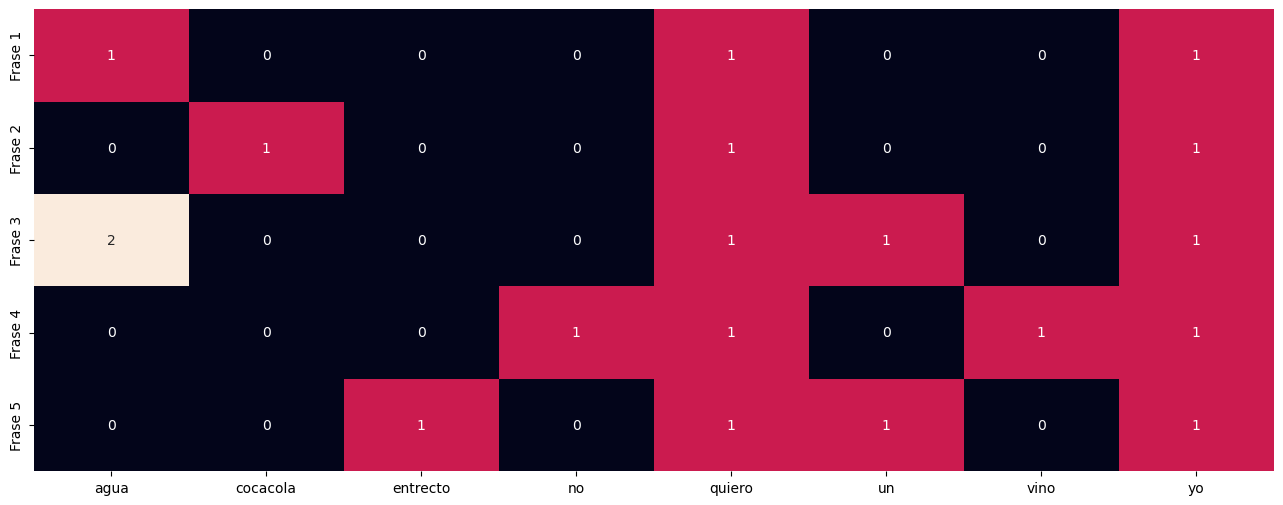

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
# Figura CountVectorizer
sns.heatmap(count_data_result, annot=True, cbar=False,
           xticklabels=count_data.get_feature_names_out(),
           yticklabels = ["Frase 1","Frase 2","Frase 3", "Frase 4", "Frase 5"])

<Axes: >

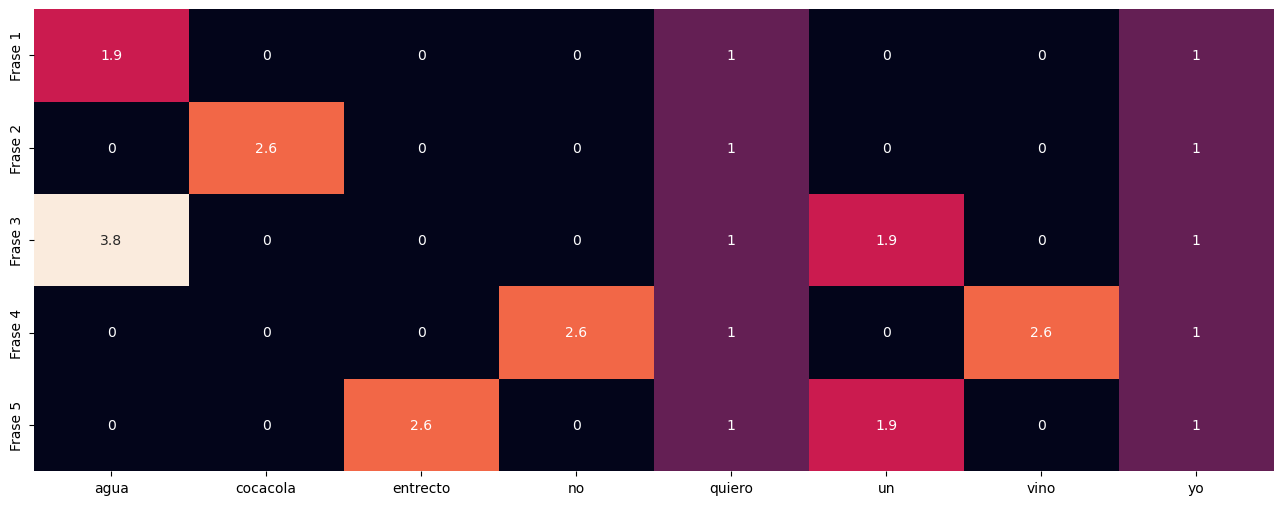

In [35]:
plt.figure(figsize = (16,6))
sns.heatmap(tfidf_data_result, annot=True,cbar=False,
            xticklabels=count_data.get_feature_names_out(),
           yticklabels = ["Frase 1","Frase 2","Frase 3", "Frase 4", "Frase 5"])